In [ ]:
!gdown 1O--EqhrRuyiHH8kpeKFtJ83uMBD01MG6

Downloading...
From: https://drive.google.com/uc?id=1O--EqhrRuyiHH8kpeKFtJ83uMBD01MG6
To: /content/teleCust1000t.csv
100% 37.0k/37.0k [00:00<00:00, 66.9MB/s]


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

# 1) Read csv File

In [ ]:
data = pd.read_csv("teleCust1000t.csv")
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
num_rows = data.shape[0]
num_columns = data.shape[1]
column_names = data.columns.tolist()

num_rows
num_columns
column_names

['region',
 'tenure',
 'age',
 'marital',
 'address',
 'income',
 'ed',
 'employ',
 'retire',
 'gender',
 'reside',
 'custcat']

In [ ]:
# Missing Data
nan_per_column = data.isna().sum()

nan_per_column

,0
region,0
tenure,0
age,0
marital,0
address,0
income,0
ed,0
employ,0
retire,0
gender,0


# 2) Heatmap & Histogram

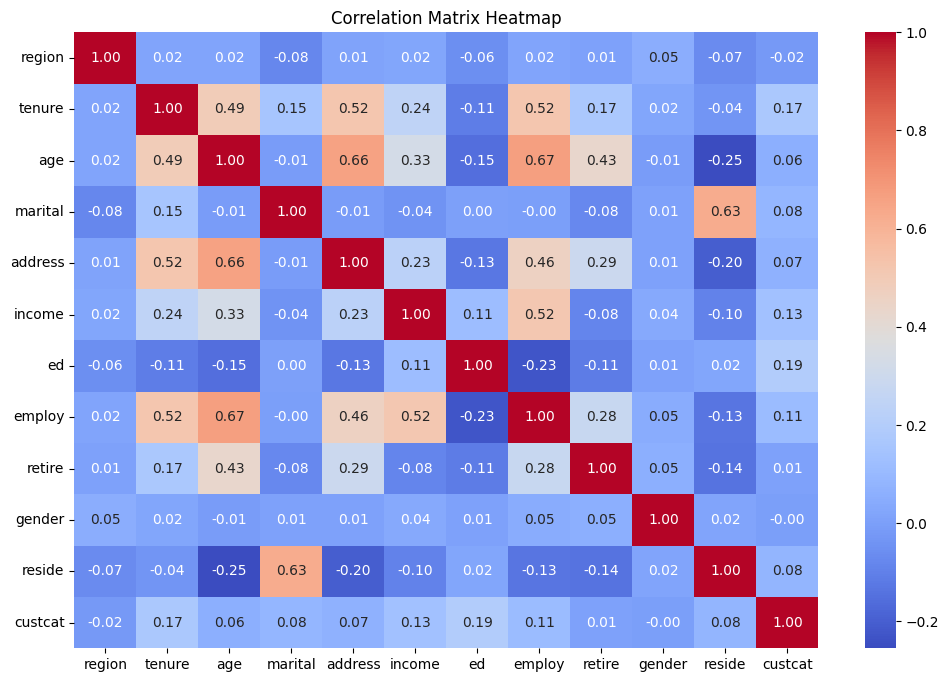

In [ ]:
# Heatmap

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

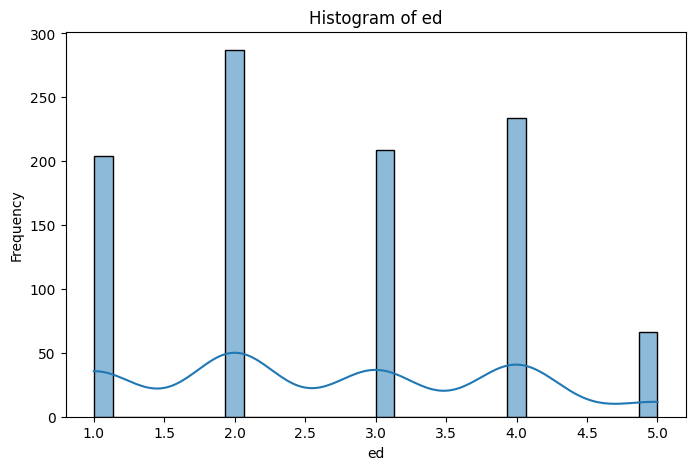

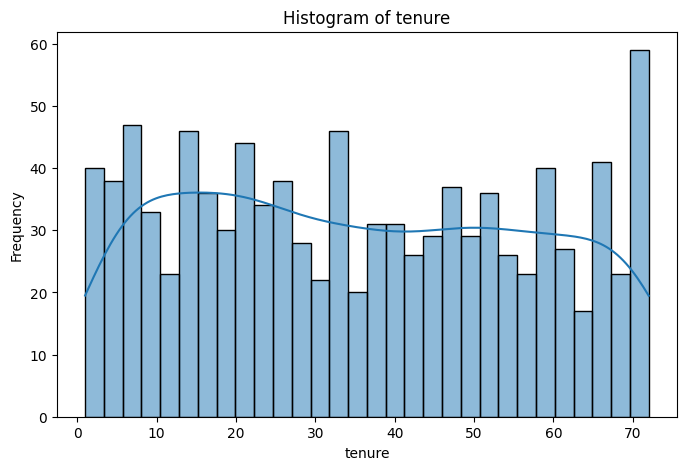

Index(['ed', 'tenure'], dtype='object')

In [ ]:
# Histogram

target_column = "custcat"
if target_column in data.columns:
    correlations = correlation_matrix[target_column].drop(target_column)
    top_features = correlations.abs().nlargest(2).index

for feature in top_features:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[feature], kde=True, bins=30)
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

top_features

# 3) Normalization

In [ ]:
X = data.drop(columns=[target_column])
y = data[target_column]

y = pd.get_dummies(y, prefix='class')

# Train 60% Test 20% Validation 20%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=3)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=3)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

In [ ]:
class_counts = y_train.sum()
print(class_counts)

class_1    161
class_2    133
class_3    169
class_4    137
dtype: int64


# 4) MLP Network

In [118]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

### Impact of the Number of Neurons

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


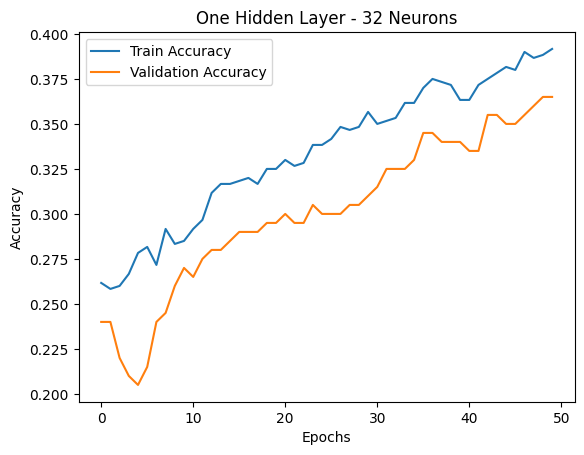

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


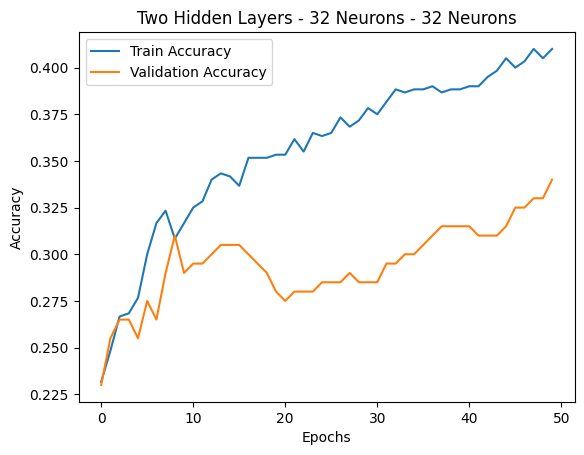

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


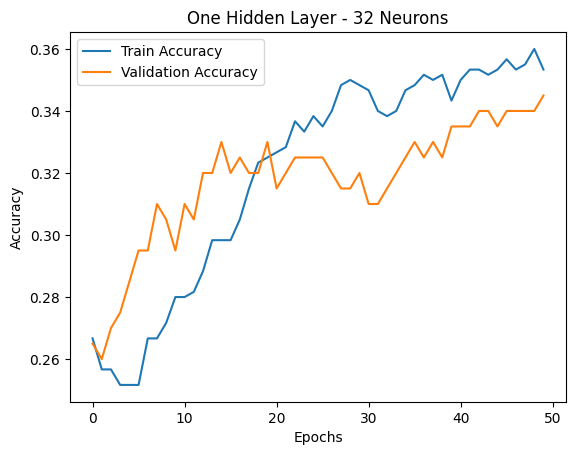

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


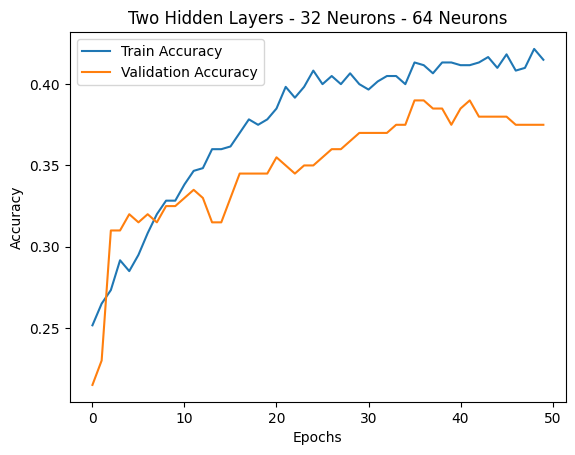

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


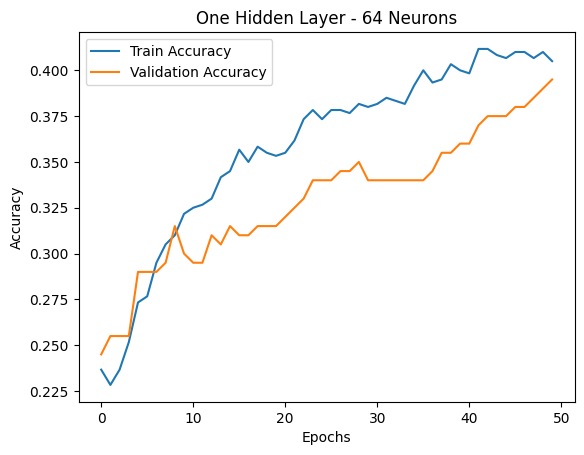

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


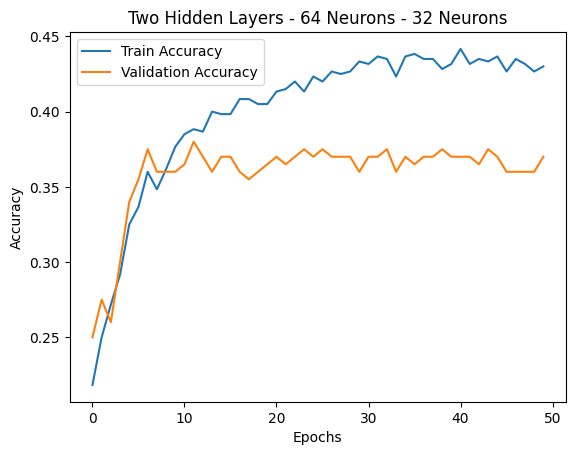

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


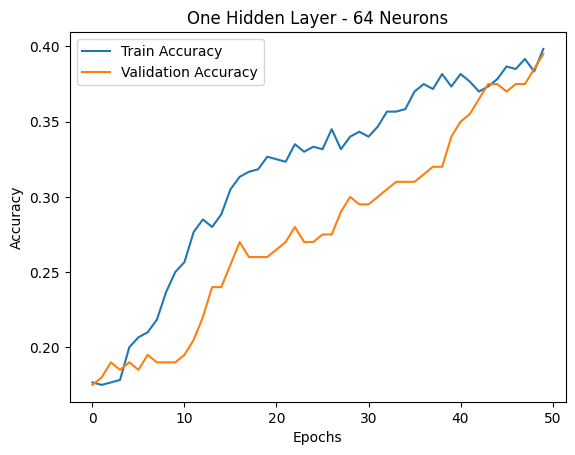

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


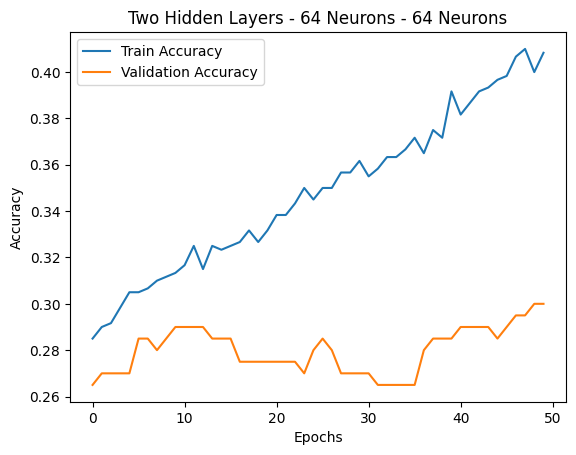

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


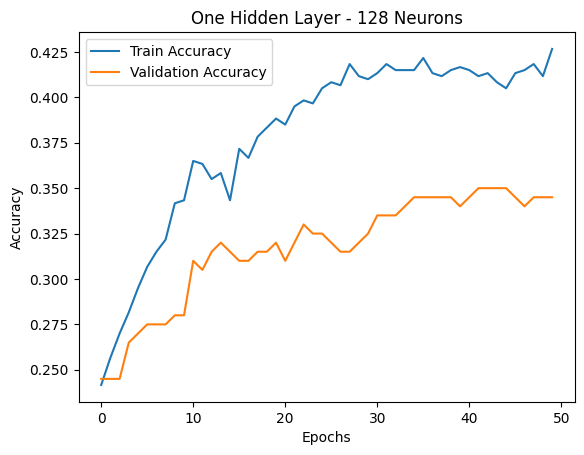

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


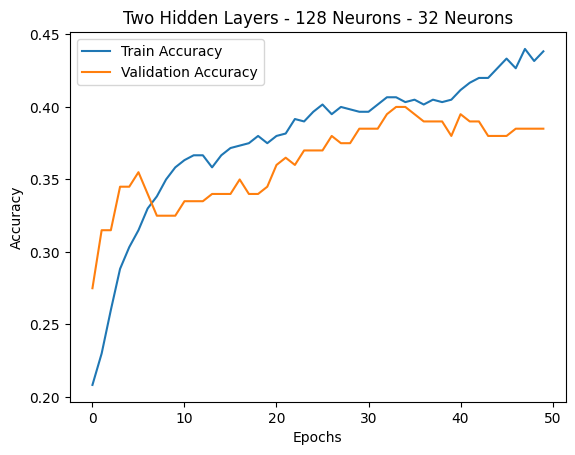

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


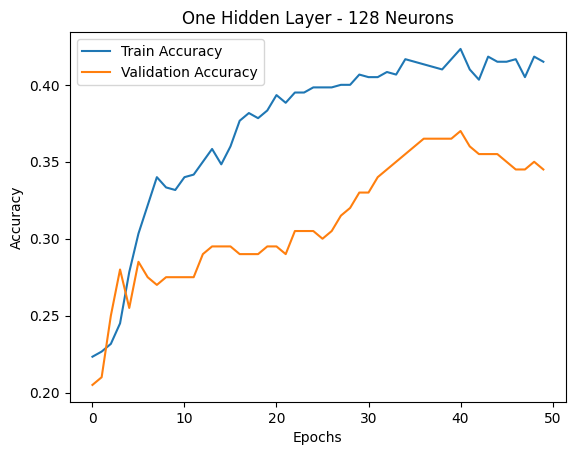

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


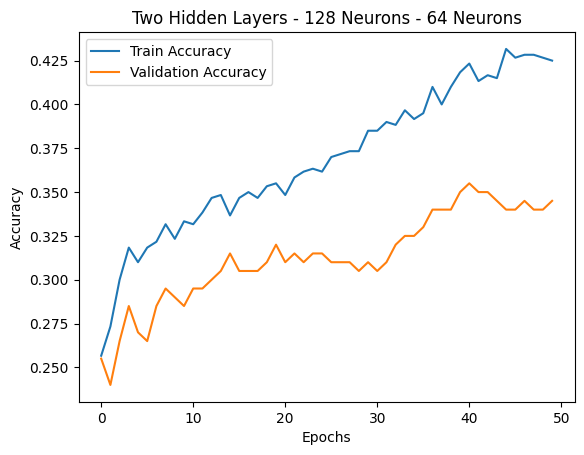

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


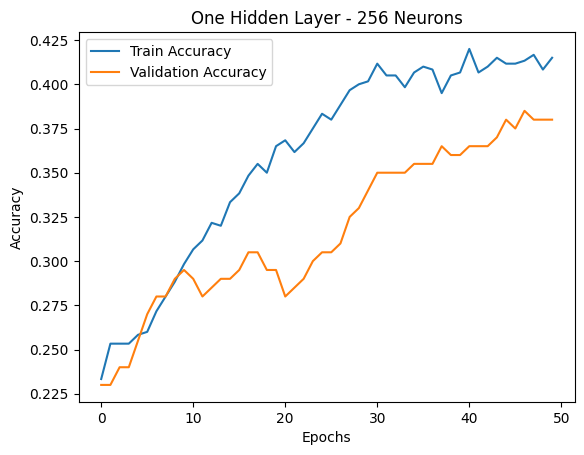

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


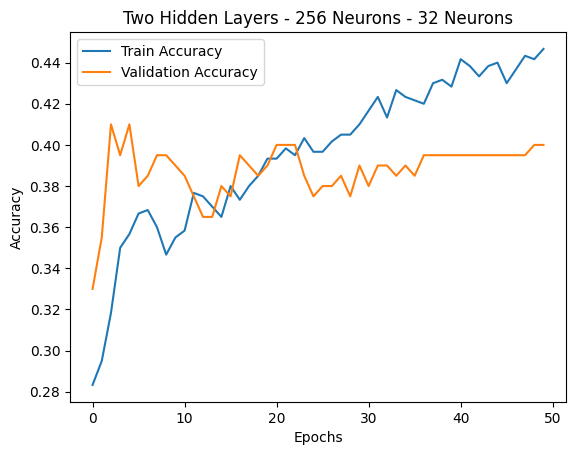

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


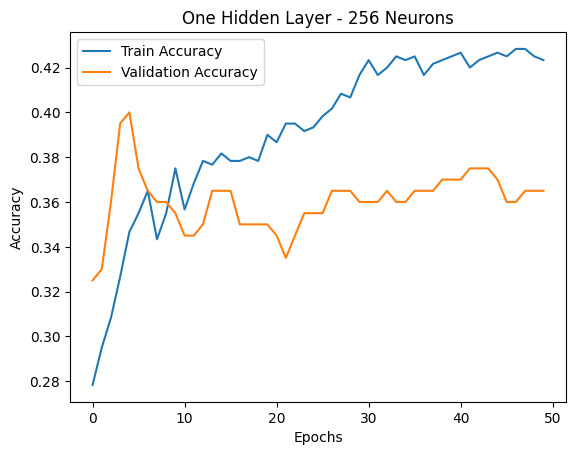

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


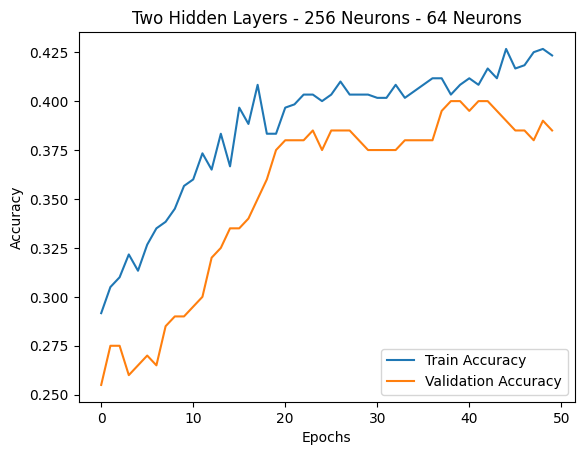

In [ ]:
# One Hidden Layer Model
def create_model_one_hidden_layer(num_neurons, num_classes):
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Two Hidden Layer Model
def create_model_two_hidden_layers(num_neurons, num_neurons2, num_classes):
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(num_neurons2, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model Training
def train_model(model, optimizer, epochs=50, batch_size=32):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0)
    return history

# Evaluation
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Number of neurons
neuron_counts = [32, 64, 128, 256]
neuron_counts2 = [32, 64]
num_classes = y_train.shape[1]

for neurons in neuron_counts:
  for neurons2 in neuron_counts2:
    # One Hidden Layer Model
    model_one_layer = create_model_one_hidden_layer(neurons, num_classes)
    history_one_layer = train_model(model_one_layer, optimizer=SGD(learning_rate=0.01))
    plot_history(history_one_layer, f"One Hidden Layer - {neurons} Neurons")

    # Two Hidden Layer Model
    model_two_layers = create_model_two_hidden_layers(neurons, neurons2, num_classes)
    history_two_layers = train_model(model_two_layers, optimizer=SGD(learning_rate=0.01))
    plot_history(history_two_layers, f"Two Hidden Layers - {neurons} Neurons - {neurons2} Neurons")


### Impact of Normalization Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


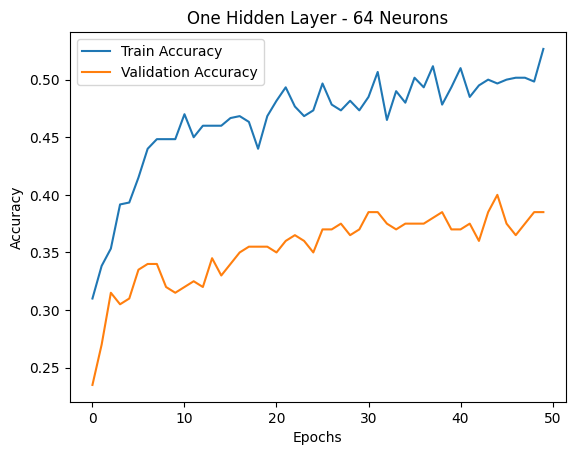

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


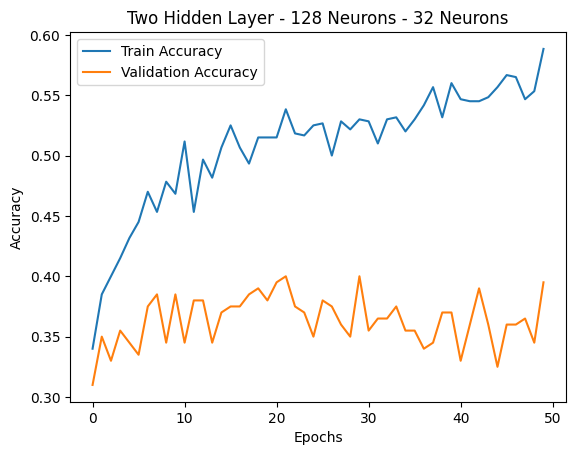

In [ ]:
# 1 Hidden Layer
model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dense(num_classes, activation='softmax')
    ])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("One Hidden Layer - 64 Neurons")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 2 Hidden Layer
model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(num_classes, activation='softmax')
    ])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Two Hidden Layer - 128 Neurons - 32 Neurons")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Impact of Dropout

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


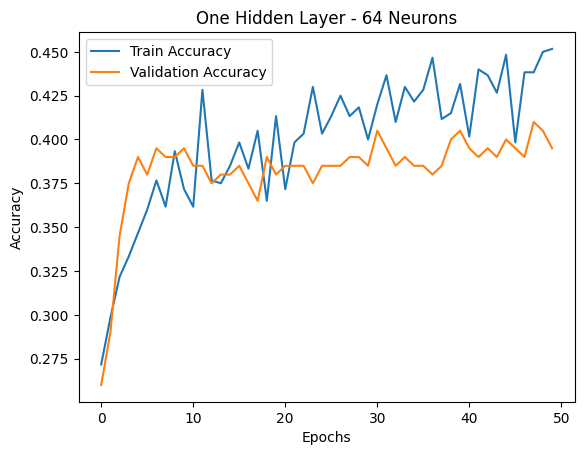

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


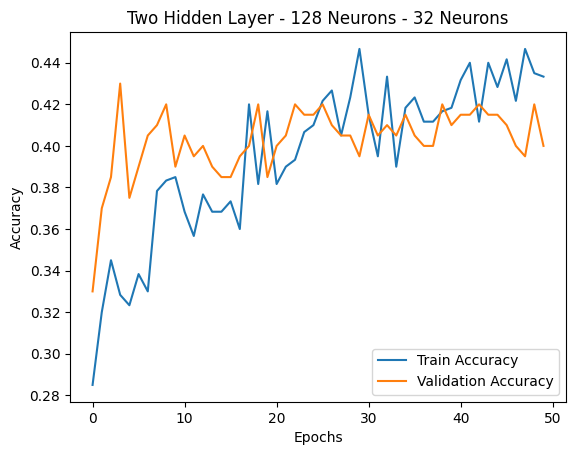

In [ ]:
# 1 Hidden Layer
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),  # 50% of neurons will be dropped
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("One Hidden Layer - 64 Neurons")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 2 Hidden Layer
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout after the first layer
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Dropout after the second layer
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Two Hidden Layer - 128 Neurons - 32 Neurons")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Impact of L2_Regularization

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


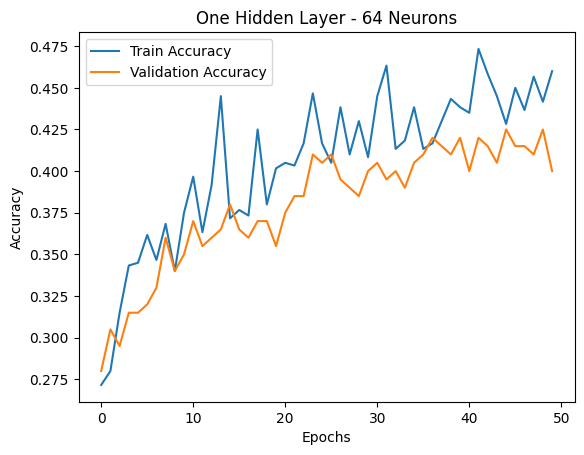

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


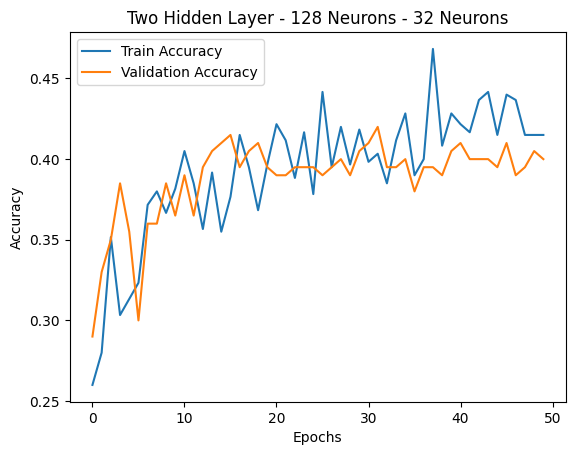

In [ ]:


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),  # 50% of neurons will be dropped
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.0001))
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("One Hidden Layer - 64 Neurons")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    Dropout(0.3),  # Dropout after the first layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout after the second layer
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.0001))
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Two Hidden Layer - 128 Neurons - 32 Neurons")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Impact of Adam optimizer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


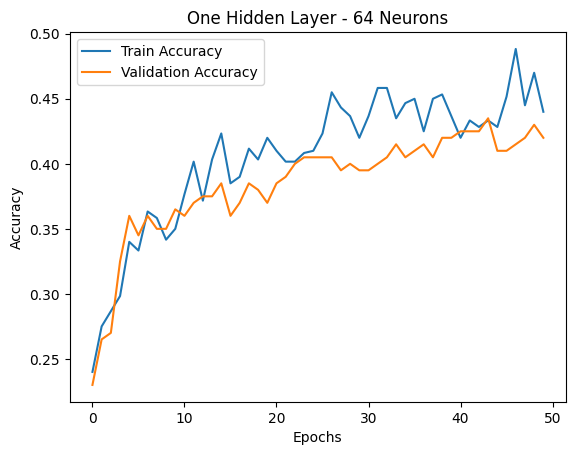

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


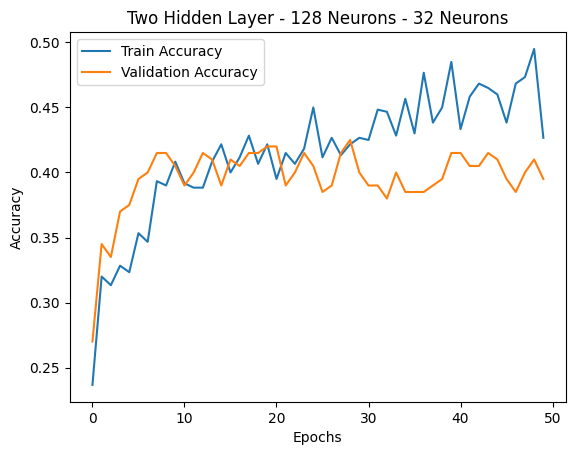

In [ ]:


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),  # 50% of neurons will be dropped
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.0001))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("One Hidden Layer - 64 Neurons")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    Dropout(0.3),  # Dropout after the first layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout after the second layer
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.0001))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Two Hidden Layer - 128 Neurons - 32 Neurons")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 5) Evaluat Models on Test Dataset

In [107]:
# Model 1 (One Hidden Layer)
model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),  # 50% of neurons will be dropped
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.0001))
])

# Compile and train Model 1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

# Evaluate Model 1 on test dataset
test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test)
print(f"Model 1 Test Loss: {test_loss_1}, Test Accuracy: {test_acc_1}")

# Model 2 (Two Hidden Layers)
model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),  # Dropout after the first layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout after the second layer
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.0001))
])

# Compile and train Model 2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

# Evaluate Model 2 on test dataset
test_loss_2, test_acc_2 = model_2.evaluate(X_test, y_test)
print(f"Model 2 Test Loss: {test_loss_2}, Test Accuracy: {test_acc_2}")

# Randomly select 10 samples from the test dataset
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)
X_test_random = X_test.iloc[random_indices]
y_test_random = y_test.iloc[random_indices]  # Use actual y values in one-hot format

# Make predictions using Model 1 (One Hidden Layer)
y_pred_1 = model_1.predict(X_test_random)
y_pred_1_classes = np.argmax(y_pred_1, axis=1)

# Make predictions using Model 2 (Two Hidden Layers)
y_pred_2 = model_2.predict(X_test_random)
y_pred_2_classes = np.argmax(y_pred_2, axis=1)

# Display comparison of predictions with actual values
print(f"{'Sample':<8} {'Model 1':<20} {'Model 2':<20} {'Actual':<15}")
print('-' * 60)

for i in range(10):
    real_class = np.argmax(y_test_random.iloc[i].values)
    print(f"{i + 1:<8} {y_pred_1_classes[i]:<20} {y_pred_2_classes[i]:<20} {real_class:<15}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3980 - loss: 1.2338 
Model 1 Test Loss: 1.260886549949646, Test Accuracy: 0.3799999952316284
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4188 - loss: 1.2301 
Model 2 Test Loss: 1.2576104402542114, Test Accuracy: 0.4000000059604645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Sample   Model 1              Model 2              Actual         
------------------------------------------------------------
1        0                    0                    0              
2        1                    1                    1              
3        2                    2                    2              
4        0                    0                    0              
5        3                    3                    3              
6        1                    0                    2              
7        2                    0                    2              
8        0                    0       

# 6) Ensemble Learning (Hard Voting)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Voting Classifier Accuracy: 0.405
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.61      0.52        51
           1       0.27      0.30      0.28        37
           2       0.39      0.33      0.36        61
           3       0.49      0.37      0.42        51

    accuracy                           0.41       200
   macro avg       0.40      0.40      0.39       200
weighted avg       0.41      0.41      0.40       200



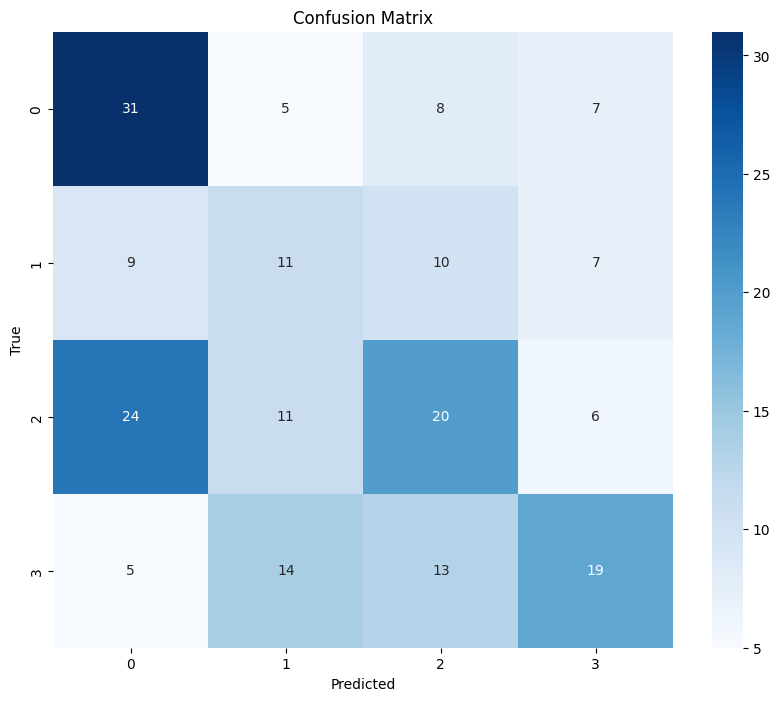

Test Accuracy: 0.405
Error Rate: 0.59


In [128]:
# Define model 1
def create_model_1():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.0001))
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define model 2
def create_model_2():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.0001))
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train both models individually
model_1 = create_model_1()
model_2 = create_model_2()

model_1.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
model_2.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Get predictions for test set from both models
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

# Apply majority voting (hard voting)
y_pred_voting = np.argmax(y_pred_1, axis=1) == np.argmax(y_pred_2, axis=1)

# Voting Prediction
y_pred_final = np.array([y_pred_1[i] if y_pred_voting[i] else y_pred_2[i] for i in range(len(y_pred_1))])

# Get the final prediction and evaluate the accuracy
y_pred_classes = np.argmax(y_pred_final, axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
print(f"Voting Classifier Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(f"Test Accuracy: {accuracy}")

error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.2f}")

